# Run and Plot FluSight Forecasts (2024-2025 season)<a class="anchor" id="top"></a>

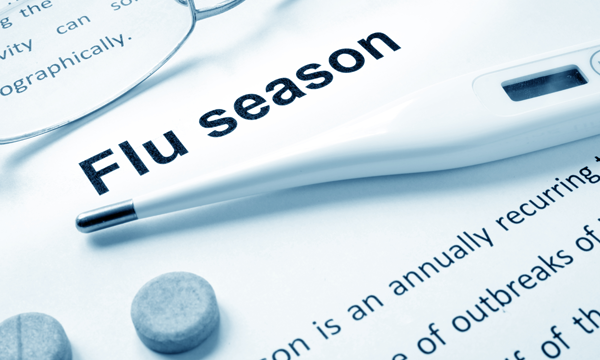

## Table of contents

* [Run forecast](#run-forecast)
* [Import forecast files](#import-forecast)
* [Plot fore quantiles](#plot-fore-quantiles)

In [1]:
import gc
import importlib
import os
from pathlib import Path
import sys
import time

import IPython.display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import ticker
# from matplotlib import dates
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd

# MANUALLY ADD RTREND LIBRARY PATH
sys.path.append("../../Rtrend_project/")
# Move to project root directory
if os.path.basename(os.getcwd()) != "programs":
    os.chdir("..")  # Move to project root
print(f"Working directory: {os.getcwd()}")

from rtrend_forecast.reporting import get_rtrend_logger, SUCCESS
import rtrend_forecast.visualization as vis
import utils.flusight_tools as fst
import utils.truth_data_structs as tds

# ------

_LOGGER = get_rtrend_logger().getChild("jupyter")
# ---
# %matplotlib notebook
%matplotlib widget
mpl.rcParams["pdf.fonttype"] = 42

main_rc = mpl.rcParams.copy()

main_rc["patch.linewidth"] = 0.
aggr_ref_tlabel = pd.Timestamp("2023-10-08")  # Sunday 00am, turns epiweek

# Define and reset the matplotlib figures in the notebook
try: 
    for _fig in mpl_figs: plt.close(_fig)
except NameError: pass
finally: mpl_figs = list()
plt.close("all")
gc.collect()
fig_kwargs = dict(num=1, clear=True) # Based on: https://stackoverflow.com/questions/28757348/how-to-clear-memory-completely-of-all-matplotlib-plots


Working directory: /Users/pventura/NonCloudStorage/Flu_forecast/programs


# Run forecast <a class="anchor" id="run-forecast"></a>

[Back to top](#top)

In [21]:
do_run = True
do_export = True
# now_str = pd.Timestamp.now().date().isoformat()
now_str = (pd.Timestamp.now() - pd.Timedelta("3d")).date().isoformat()
# now_str = "2024-04-22"  # Date of the last forecast done
print(f"Now str = {now_str}")

if do_run:
    xt0 = time.time()
    cmd = f"source activate rtrend_dev && python flusight_forecast.py --now {now_str}"
    cmd += "" if do_export else " --no-export"
    os.system(cmd)
    xtf = time.time()
    print("----------")
    print(f"Total script execution time = {xtf - xt0:0.2f}s")
else:
    print("Skipped")

Now str = 2025-02-09
[Alabama_2025-02-08] WARNING: 8 negative values were found in the preprocessed past incidence series  will be handled with method 'shift'. (`self.inc.past_gran_sr`). 
	 – The minimum is -0.08040758598244363.
	 – The sum is -0.44084759292624903.
[Arkansas_2025-02-08] Level 15: Forecast concluded
[Alabama_2025-02-08] Level 15: Forecast concluded
[Connecticut_2025-02-08] Level 15: Forecast concluded
[Florida_2025-02-08] Level 15: Forecast concluded
[Idaho_2025-02-08] Level 15: Forecast concluded
[Delaware_2025-02-08] WARNING: 35 negative values were found in the preprocessed past incidence series  will be handled with method 'shift'. (`self.inc.past_gran_sr`). 
	 – The minimum is -0.08609152321336377.
	 – The sum is -1.5299554308905676.
[California_2025-02-08] Level 15: Forecast concluded
[Delaware_2025-02-08] Level 15: Forecast concluded
[Alaska_2025-02-08] Level 15: Forecast concluded
[Illinois_2025-02-08] Level 15: Forecast concluded
[Georgia_2025-02-08] Level 15: 



- Now date ................ 2025-02-09 00:00:00 
- Next submission due date  2025-02-12 23:00:00 
- Reference date .......... 2025-02-15 00:00:00 
- Last day in truth data .. 2025-02-08 00:00:00
- Forecast day_present .... 2025-02-08 00:00:00

Flusight exportable dataframe:
     reference_date                   target  ...  output_type_id    value
0        2025-02-15          wk inc flu hosp  ...            0.01  436.000
1        2025-02-15          wk inc flu hosp  ...            0.01  249.000
2        2025-02-15          wk inc flu hosp  ...            0.01  140.000
3        2025-02-15          wk inc flu hosp  ...            0.01   76.000
4        2025-02-15          wk inc flu hosp  ...           0.025  451.000
...             ...                      ...  ...             ...      ...
5819     2025-02-15  wk flu hosp rate change  ...        increase    0.041
5820     2025-02-15  wk flu hosp rate change  ...  large_increase    0.072
5821     2025-02-15  wk flu hosp rate change  ..

# Import forecast files <a class="anchor" id="import-forecast"></a>

In [22]:
# -------------------------------
# PARAMETERS
# -------------------------------
truth_data_file = Path("hosp_data/truth_latest.csv")
# truth_data_file = Path("hosp_data/season_2024-2025/truth_2024-11-27.csv")
# now = pd.Timestamp(now_str)
now = pd.Timestamp.now()

# # --- Select output 
output_dir = Path("outputs/latest/")
flusight_output_file = Path("forecast_out/latest.csv")
now = pd.Timestamp(now_str)

# # # # # # # # # # # Past !! 
# output_dir = Path("outputs/flusight_2025-02-01/")
# flusight_output_file = Path("forecast_out/2025-02-01-CEPH-Rtrend_fluH.csv")
# # truth_data_file = Path("hosp_data/season_2024-2025/truth_2024-12-18.csv")

# # # Experimental
# output_dir = Path("outputs/tests/rtrend_refactor_after/")
# flusight_output_file = Path("forecast_out/tests/rtrend_refactor_after.csv")
# now = pd.Timestamp("2024-11-26")

# -------------------------------
# IMPORTS
# -------------------------------
importlib.reload(fst)
importlib.reload(tds)


obj = fst.FluSightGeneralOutputs(output_dir)
# truth = tds.FluDailyTruthData(truth_data_file)
truth = tds.FluWeeklyTruthData(truth_data_file, pop_data_path="aux_data/locations.csv")
dates = fst.FluSightDates(now)

fsobj = fst.FluSight2023Fore(flusight_output_file)

# TODO: The objects to hold the truth, forecast and hubverse forecast data should be revised!
#  They can have better patterns and be more compatible between one another.
    
obj.q_df

2025-02-09    2025-02-16    2025-02-23    2025-03-02  \
location_name quantile                                                          
Alabama       0.010       73.256594    435.706373    248.727434    140.124532   
              0.025       75.812057    451.039148    267.471752    156.735039   
              0.050       77.941609    469.353297    288.767273    175.475098   
              0.100       80.922982    491.926550    319.006914    204.011097   
              0.150       82.626624    507.685236    344.135630    226.158440   
...                             ...           ...           ...           ...   
US            0.850     7404.558654  51467.643435  50442.200898  46168.267385   
              0.900     7574.011958  53165.290845  53727.782595  50468.228133   
              0.950     7826.323102  55645.338364  58846.899790  57375.981984   
              0.975     8017.840624  57741.463851  63101.139140  63282.204879   
              0.990     8266.435467  59902.504139  67523.046372  69473.795919   

                          2025-03-09    2025-03-16    2025-03-23  
location_name quantile                                            
Alabama       0.010        75.807798     40.035581     18.740059  
              0.025        89.441191     50.683342     24.702805  
              0.050       106.477608     62.182923     31.517372  
              0.100       127.347219     78.793430     43.016954  
              0.150       147.790920     94.978027     53.238804  
...                              ...           ...           ...  
US            0.850     39836.244588  32676.599218  22519.659952  
              0.900     44456.306125  37093.687274  25846.132457  
              0.950     51997.349157  44159.376397  31084.278338  
              0.975     58492.952292  50309.657547  35744.294082  
              0.990     65231.470128  56633.898424  40489.661308  

[1196 rows x 7 columns]

# Quantile forecats <a class="anchor" id="plot-fore-quantiles"></a>

In [23]:
rc = main_rc.copy()
importlib.reload(vis)

do_save_plots = True
do_open_plots = True
# dt_behind = pd.Timedelta("3w")
dt_behind = pd.Timedelta("72w")
# dt_behind = pd.Timedelta("118w")

with plt.rc_context(rc):
    use_states = obj.q_df.index.get_level_values("location_name").unique()
    num_states = len(use_states)
    with plt.ioff():
        fig, axes = vis.make_axes_seq(num_states, max_cols=1, total_width=15., ax_height=6., fig_kwargs=fig_kwargs)  # Wider panels
        mpl_figs.append(fig)
    
    _LOGGER.info("Plotting...")
    for i_ax, state_name in enumerate(use_states):
        ax = axes[i_ax]
        
#         truth_sr = truth.xs_state_weekly(state_name, aggr_ref_tlabel).loc[dates.now - dt_behind:]
        truth_sr = truth.xs_state(state_name).loc[dates.now - dt_behind:]
        
        # -()- From forecast submission file
        plot_df = fsobj.quantiles_df.xs(truth.state_name_to_id[state_name], level="location").T
        
#         # -()- From general dataset
#         q_df = obj.q_df.xs(state_name).copy()
#         plot_df = q_df.iloc[:, 1:]  # EXCLUDES FIRST WEEK (incomplete)        
                
        # Plot commands
        # -------------
        # --- Truth series
#         ax.plot(truth_sr, "o-", ms=3)
        ax.plot(truth_sr)
    
        # --- Quantile forecats
        previous_week = plot_df.columns[0] - pd.Timedelta("1w")
        
        vis.plot_fore_quantiles_as_area(
            ax, plot_df,  
#             prepend_point=(previous_week, truth_sr[previous_week])
        )
        
        # --- Preprocessed (filtered) data
        if state_name != "US":
            filt_sr = obj.preproc_df.xs(state_name, level="location_name")["past_denoised"]
            ax.plot(filt_sr, "--")

        # Extra
        ax.set_title(f"{state_name} ({truth.state_name_to_id[state_name]})" )
        ax.text(  # R(t) synthesis method
            0.85, 0.85, obj.meta_dict["synth_method_used"].get(state_name, "[[no-method]]"),
            transform=ax.transAxes,
        )
        
        # NHSN data "disclaimer lines": report mandates
        ax.plot(2 * [pd.Timestamp("2024-05-01")], [0, truth_sr.max()], ":")
        ax.plot(2 * [pd.Timestamp("2024-11-01")], [0, truth_sr.max()], ":")
        
        ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())

        ax.set_xlim(dates.now - dt_behind, dates.now + pd.Timedelta("4w"))
        vis.rotate_ax_labels(ax)
    
    fig.tight_layout()
    
    if do_save_plots:
        os.makedirs("tmp_figs/", exist_ok=True)
        fig.savefig(f"tmp_figs/ct_states.pdf")
        print(f"Saved to tmp_figs dir. Click the link below to open:")
        flink = IPython.display.FileLink("../tmp_figs/ct_states.pdf")
        display(flink)
        if do_open_plots:
            os.system("open tmp_figs/ct_states.pdf")
        
    else:  # Only displays if not saved
        display(fig.canvas)



[jupyter] INFO: Plotting...
Saved to tmp_figs dir. Click the link below to open:


/Users/pventura/NonCloudStorage/Flu_forecast/tmp_figs/ct_states.pdf

# Reproduction number

[Back to run](#run-forecast)

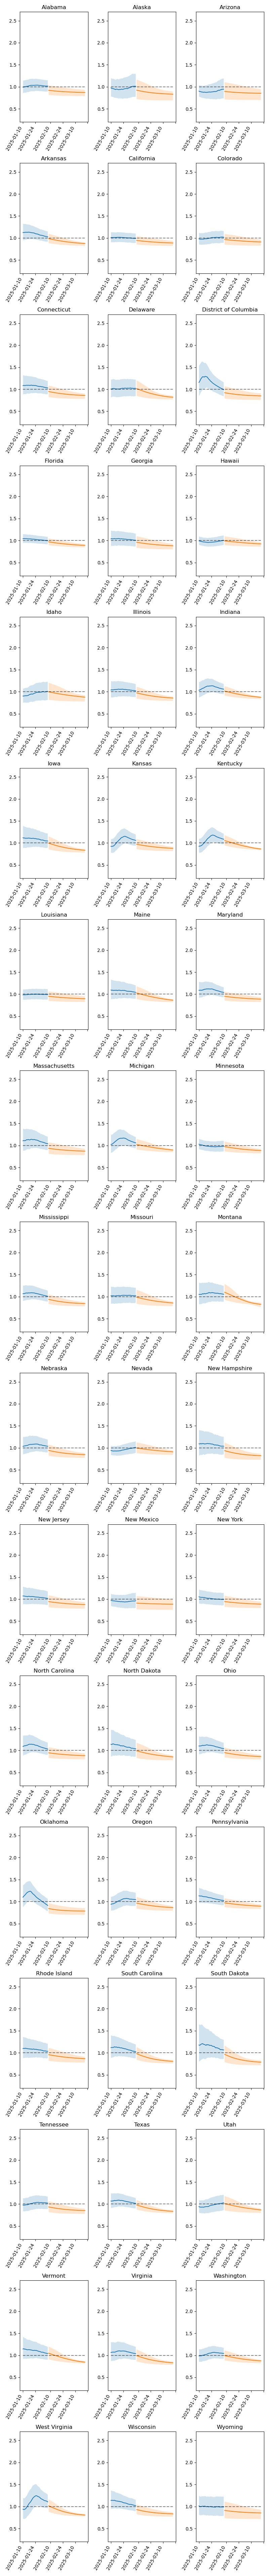

In [24]:

# ---------
rc = main_rc.copy()

do_save_plots = False

with plt.rc_context(rc):
    
#     # ----TEST
#     state_name = "California"
    use_states = obj.rt_past_df.index.get_level_values("location_name").unique()
    num_states = len(use_states)
    fig, axes = vis.make_axes_seq(num_states, total_width=8., ax_height=4.5)
    mpl_figs.append(fig)
    
    for i_ax, state_name in enumerate(use_states):
        ax = axes[i_ax]

        rt_past = obj.rt_past_df.xs(state_name, level="location_name").iloc[1:]
        rt_fore = obj.rt_fore_df.xs(state_name, level="location_name")

        # R(t) past
        ax.plot(rt_past["rt_past_median"])
        ax.fill_between(
            rt_past.index,
            rt_past["rt_past_low_q"],
            rt_past["rt_past_high_q"],
            alpha=0.2
        )

        # R(t) fore
        ax.plot(rt_fore["rt_fore_median"])
        ax.fill_between(
            rt_fore.index,
            rt_fore["rt_fore_low_q"],
            rt_fore["rt_fore_high_q"],
            alpha=0.2
        )
        # Reference lines
        ax.plot([rt_past.index[0], rt_fore.index[-1]], [1., 1.], "k--", alpha=0.5)

        # Extra
        ax.set_title(state_name)
        ax.set_ylim(0.2, 2.7)
        ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())
        vis.rotate_ax_labels(ax)
    
    fig.tight_layout()
    
    if do_save_plots:
        fig.savefig(f"tmp_figs/rt_states.pdf")
    

# View categorical rate change forecasts

[Back to run](#run-forecast)

In [25]:
# #-- -- - Load submittable file


fore_df = pd.read_csv(
    "forecast_out/latest.csv", 
#     "forecast_out/WEIRD_2024-12-21-CEPH-Rtrend_fluH.csv",
#     "forecast_out/2024-11-30-CEPH-Rtrend_fluH.csv",
    
    
#     "forecast_out/tests/old_forecast_test.csv", 
    parse_dates=["reference_date", "target_end_date"])

color_map = plt.get_cmap("RdYlGn")
color_i_seq = np.array([1.00, 0.75, 0.50, 0.25, 0.00])

target_end_date  2025-02-15  2025-02-22  2025-03-01  2025-03-08
output_type_id                                                 
large_decrease        0.392       0.522       0.635       0.717
decrease              0.295       0.259       0.219       0.191
stable                0.099       0.070       0.052       0.041
increase              0.142       0.098       0.065       0.041
large_increase        0.072       0.051       0.029       0.010

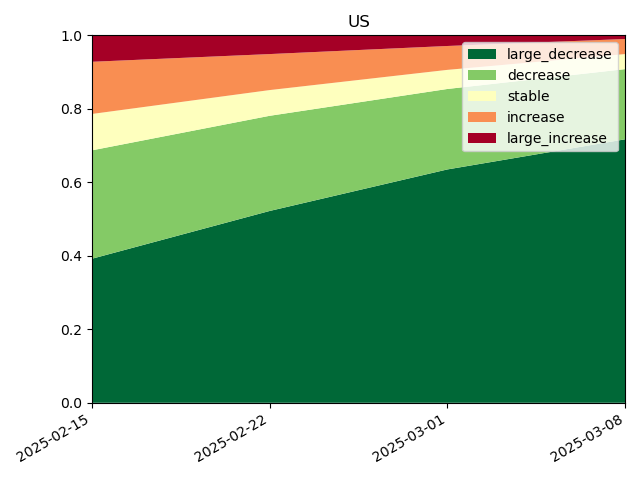

In [28]:
state_name = "US"  # "Illinois"  # "US"

# ----------
# -! NOTE will need to read the population file to convert between state ID and name

# -()- "Decrease" as base
rate_change_names = [
    "large_decrease", "decrease", "stable", "increase", "large_increase"]
color_i_seq = np.array([1.00, 0.75, 0.50, 0.25, 0.00])

# # -()- "Increase" as base (looks better, as moving to "increase" is actually an increasing curve)
# rate_change_names = [
#     "large_increase", "increase", "stable", "decrease", "large_decrease"]
# color_i_seq = np.array([0.0, 0.25, 0.50, 0.75, 1.0])


rate_change_id = {name: i for i, name in enumerate(rate_change_names)}  # Signature: r[i] = name

# ---------------

# -! TODO: also a version that aggregates some levels.

# --- Select data (state, rate change)
df = fore_df.loc[
      (fore_df["location"] == truth.state_name_to_id[state_name])
    & (fore_df["target"] == "wk flu hosp rate change")
    & (fore_df["output_type"] == "pmf")
]

# --- Convert values into a 2D table 
df.set_index(["output_type_id", "target_end_date"], inplace=True)
df.reindex()

value_table = df["value"].unstack("target_end_date").loc[rate_change_names]
#  ^  ^  Signature: df.loc[output_type_id, target_end_date]

display(value_table)

# --------------- PLOT

rc = dict()
rc["axes.prop_cycle"] = mpl.cycler(color=color_map(color_i_seq))

with mpl.rc_context(rc):
    fig, ax = plt.subplots()

    ax.stackplot(value_table.columns, value_table, labels=rate_change_names)
    
    # TODO: set locator
    ax.legend()
    ax.set_title(state_name)
    ax.set_xlim(value_table.columns[0], value_table.columns[-1])
    ax.set_ylim(0., 1.0)
    
    ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(5))
    
    vis.rotate_ax_labels(ax, angle=30)
    fig.tight_layout()

In [92]:
# value_table.sort_index(axis=0, key=lambda s: rate_change_id[s])
value_table.loc[rate_change_names]

target_end_date  2024-12-21  2024-12-28  2025-01-04  2025-01-11
output_type_id                                                 
large_decrease     0.000000    0.000000    0.000000    0.000000
decrease           0.000000    0.000000    0.000000    0.000000
stable             0.000000    0.000000    0.000000    0.030204
increase           0.927959    0.795612    0.875306    0.969694
large_increase     0.072041    0.204388    0.124694    0.000102

----